In [1101]:
import numpy as np
from math import factorial
from scipy import optimize, interpolate
from scipy.integrate import odeint, simps
from scipy.special import eval_hermite, gamma, jv
import matplotlib.pyplot as plt
%matplotlib inline

-1.2001704918511815


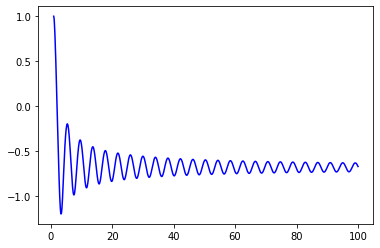

In [233]:
def ode(phi, t):
    dphi = np.zeros(len(phi))
    
    dphi[0] = phi[1]
    dphi[1] = -(3/(2*t))*phi[1] - 1 - phi[0] - phi[0]**3 
    
    return dphi

phi = [1, 0]
t = np.linspace(1, 100, 1000)

phi_1 = odeint(ode, phi, t)[:, 0]

plt.plot(t, phi_1, "b")
print(np.min(phi_1))

0.6906906906906904


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


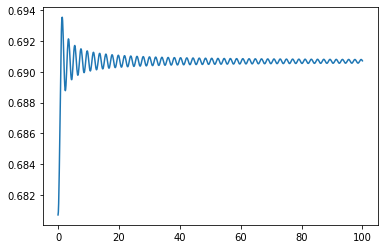

In [330]:
t = np.linspace(0, 100, 1000)
mass = 1
mu = -1
self_coupling = 1
phi = np.linspace(-10, 10, 1000)
potential = phi*mu**3 + 0.5*(mass*phi)**2 + 0.25*self_coupling*phi**4
phi_min = phi[np.argmin(potential)]
effective_mass = mass**2 + 3*self_coupling*phi_min
phi_ = (2**0.25)*gamma(5/4)*(-0.01)*(jv(0.25, effective_mass*t)/(effective_mass*t)**0.25) + phi_min
phi_[0] = phi_min - 0.01
print(phi_min)
plt.plot(t, phi_)

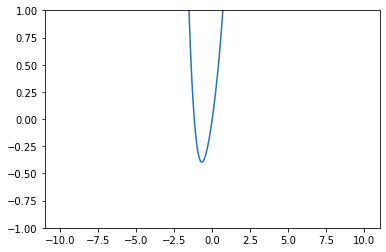

In [309]:
plt.plot(phi, potential)
plt.ylim(-1, 1)

In [235]:
t_h0 = 1/(2*(67.36e3)*(3.154e7)/(3.0856e22))
print(t_h0)
t_osc = (6.58e-25)/(2*1)
print(t_osc)
t_osc/t_h0

7261826402.99917
3.29e-25


In [280]:
np.log(t_osc)

In [281]:
np.log(t_h0)

1.645e-25
[1.00000000e-02 1.00027315e-02 1.00054638e-02 ... 7.25786088e+09
 7.25984337e+09 7.26182640e+09]


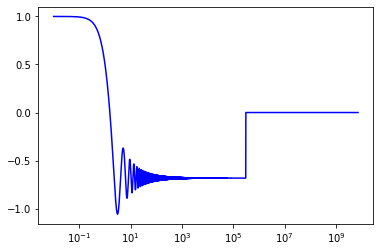

In [250]:
# Object that gives the equation of motion for the field
class equation_of_motion:
    '''Equation of motion for the field'''
    
    def __init__(self):
        # Initializes parameters
        self.mass = 1
        self.mu = 1
        self.self_coupling = 1
        self.hubble_rate_today = (67.36e3)*(3.154e7)/(3.0856e22) # yr^-1
        self.time_today = 1/(2*self.hubble_rate_today) # Year
    
    def potential(self, phi):
        '''Computes the potential of the field at a given point'''
        
        # Determine minima so the potential can be readjusted to give physical energy density values
        test_field = np.linspace(-10, 10, 1000)
        test_potential = test_field*self.mu**3 + 0.5*(self.mass*test_field)**2 + 0.25*self.self_coupling*test_field**4
        minima = np.min(test_potential)
        self.phi_minima = np.argmin(test_potential)

        # Evaluates potential
        potential = phi*self.mu**3 + 0.5*(self.mass*phi)**2 + 0.25*self.self_coupling*phi**4 + abs(minima)
        
        return potential
    
    def taylor_expansion(self,):
        '''Expands potential close to the minima'''
        
        self.effective_mass = self.mass**2 - 3*self.phi_minima*self.self_coupling
        
        
    
    def ode_field(self, phi, t):
        '''ODE system for the scalar field dynamics'''
        # Empty array to store numerical differential elements
        dphi = np.zeros(len(phi))
    
        # ODE system
        dphi[0] = phi[1]
        dphi[1] = -(3/(2*t))*phi[1] - self.mu**3 - phi[0]*self.mass**2 - self.self_coupling*phi[0]**3 
        
        #print(1)
        
        return dphi
    
    def ode_solver(self, phi):
        '''Solves the ODE system for the scalar field'''
        
        # Hubble rate at the start of oscillations
        hubble_oscillation = np.sqrt(self.mass**2 + 3*self.self_coupling*phi[0]**3)
        oscillation_time = (6.58e-25)/(2*hubble_oscillation)
        print(oscillation_time)

        t = np.logspace(-2, np.log10(self.time_today), 100000)
        print(t)
        #t = np.linspace(1, 1000, 10000)
        #t = np.linspace(oscillation_time, oscillation_time*1e27, 1000)
        # Determines the solution for the field dynamics
        field = odeint(self.ode_field, phi, t)
        
        # Determines current energy density
        energy_density = 0.5*field[:, 1]**2 + self.potential(field[:, 0])
        
        return energy_density, field, t
    
field_dynamics = equation_of_motion()

phi = [1, 0]
energy_density, field, t = field_dynamics.ode_solver(phi)
#print(field[:, 0])
#print(energy_density)
plt.plot(t[5:], field[5:, 0], "b")
plt.xscale("log")
#plt.ylim(-2, 2)
#max_y = 0.001
#plt.ylim(-max_y, max_y)

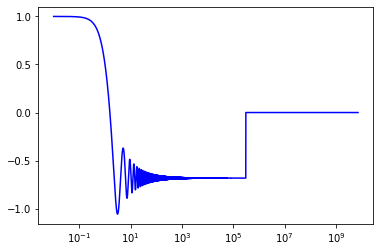

In [245]:
plt.plot(t[1:], field[1:, 0], "b")
plt.xscale("log")

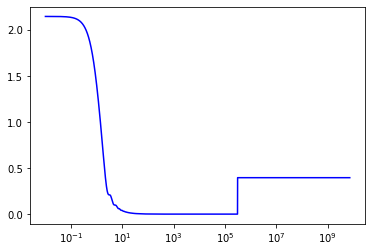

In [246]:
plt.plot(t[1:], energy_density[1:], "b")
plt.xscale("log")

In [243]:
np.argmin(energy_density)

62812

In [249]:
np.min(energy_density)

1.645e-25
[1.00000000e-02 1.00027315e-02 1.00054638e-02 ... 7.25786088e+09
 7.25984337e+09 7.26182640e+09]


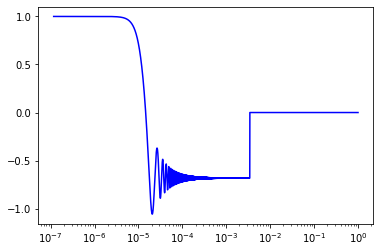

In [273]:
# Object that gives the equation of motion for the field
class equation_of_motion:
    '''Equation of motion for the field'''
    
    def __init__(self):
        # Initializes parameters
        self.mass = 1
        self.mu = 1
        self.self_coupling = 1
        self.hubble_rate_today = (67.36e3)*(3.154e7)/(3.0856e22) # yr^-1
        self.time_today = 1/(2*self.hubble_rate_today) # Year
        self.scale_today = np.sqrt(self.time_today)
    
    def potential(self, phi):
        '''Computes the potential of the field at a given point'''
        
        # Determine minima so the potential can be readjusted to give physical energy density values
        test_field = np.linspace(-10, 10, 1000)
        test_potential = test_field*self.mu**3 + 0.5*(self.mass*test_field)**2 + 0.25*self.self_coupling*test_field**4
        minima = np.min(test_potential)

        # Evaluates potential
        potential = phi*self.mu**3 + 0.5*(self.mass*phi)**2 + 0.25*self.self_coupling*phi**4 + abs(minima)
        
        return potential
    
    def ode_field(self, phi, a):
        '''ODE system for the scalar field dynamics'''
        # Empty array to store numerical differential elements
        dphi = np.zeros(len(phi))
    
        # ODE system
        dphi[0] = phi[1]
        dphi[1] = (-(1/(2*a**3))*phi[1] - self.mu**3 - phi[0]*self.mass**2 - self.self_coupling*phi[0]**3)*4*a**2
        
        #print(1)
        
        return dphi
    
    def ode_solver(self, phi):
        '''Solves the ODE system for the scalar field'''
        
        # Hubble rate at the start of oscillations
        hubble_oscillation = np.sqrt(self.mass**2 + 3*self.self_coupling*phi[0]**3)
        oscillation_time = (6.58e-25)/(2*hubble_oscillation)
        a_oscillation = np.sqrt(oscillation_time)
        print(oscillation_time)

        #t = np.logspace(-2, np.log10(self.time_today), 100000)
        print(t)
        #a = np.logspace(np.log10(a_oscillation), np.log10(self.scale_today), 1000)
        #t = np.linspace(1, 1000, 10000)
        #t = np.linspace(oscillation_time, oscillation_time*1e27, 1000)
        #a = np.linspace(a_oscillation, 100000000000000*a_oscillation, 1000)
        a = np.logspace(-2, np.log10(self.scale_today), 100000)
        # Determines the solution for the field dynamics
        field = odeint(self.ode_field, phi, a)
        
        # Determines current energy density
        energy_density = 0.5*(field[:, 1]/(2*a))**2 + self.potential(field[:, 0])
        
        return energy_density, field, a
    
field_dynamics = equation_of_motion()

phi = [1, 0]
energy_density, field, a = field_dynamics.ode_solver(phi)
#print(field[:, 0])
#print(energy_density)
plt.plot(a[5:]/np.sqrt(t_h0), field[5:, 0], "b")
plt.xscale("log")
#plt.ylim(-2, 2)
#max_y = 0.001
#plt.ylim(-max_y, max_y)

In [1102]:
class eigenfunction_finder_WKB:
    '''Class for finding the eigenfunction for a the rescaled parameters z and alpha'''
    def __init__(self):
        '''Initialises the range of rescaled field values for which the field is
        to be integrated'''
        
        # Parameters
        self.alpha_bar = 1
        self.beta = 0 
        self.eigenvalue = 0
 
    def Q_function(self, z):
        '''Evaluates Q(z) defined above
        z: array of values for which Q(z) is to be evaluated'''
        
        # Omega
        self.omega = 1 + np.sqrt(self.alpha_bar) + self.beta 
        
        # Break up calculation into multiple parts
        x_1 = ((-self.alpha_bar + ((4*np.pi**2)/3)*self.beta**2)/(3*self.omega**2))*4*np.pi**2 
        x_2 = ((32*np.pi**4)*self.alpha_bar*self.beta*z)/(9*self.omega**3)
        x_3 = - (4*np.pi**2)*((1 - (4*(np.pi*self.alpha_bar)**2)/9)/(self.omega**4))*z**2
        x_4 = ((32*np.pi**4)*self.beta*z**3)/(9*self.omega**5) + ((32*np.pi**4)*self.alpha_bar*z**4)/(9*self.omega**6)
        x_5 = ((16*np.pi**4)*z**6)/(9*self.omega**8) - ((1 + self.alpha_bar + self.beta**2)*self.eigenvalue*8*np.pi**2)/(self.omega**2)
    
        # Computes full function
        Q = x_1 + x_2 + x_3 + x_4 + x_5
    
        return Q

    def Q_function_gradient(self, z):
        '''Evaluates the gradient for Q(z) defined above
        z: array of values for which Q(z) is to be evaluated'''
    
        # Omega
        self.omega = 1 + np.sqrt(self.alpha_bar) + self.beta         
        
        # Break up calculation into multiple parts
        x_1 =  ((32*np.pi**4)*self.alpha_bar*self.beta)/(9*self.omega**3)
        x_2 = - (8*np.pi**2)*((1 - (4*(np.pi*self.alpha_bar)**2)/9)/(self.omega**4))*z
        x_3 = ((32*np.pi**4)*self.beta*z**2)/(3*self.omega**5) + ((128*np.pi**4)*self.alpha_bar*z**3)/(9*self.omega**6)
        x_4 = ((32*np.pi**4)*z**5)/(3*self.omega**8) 
    
        # Computes full function
        Q_gradient = x_1 + x_2 + x_3 + x_4
    
        return Q_gradient

    def WKB_function(self, WKB_lower_limit, WKB_upper_limit):
        '''Evaluates WKB approximation of eigenfunction to second-order
        upper_limit: upper integration limit
        lower_limit: lower integration limit'''
    
        # Creates array of z values
        z = np.linspace(WKB_lower_limit, WKB_upper_limit, 5000)
        dz = z[1] - z[0]
    
        # Q and its derivatives
        Q = self.Q_function(z)
        Q_gradient = self.Q_function_gradient(z)
    
    
        # Integration for S_0 and S_1
        S_0 = simps(np.sqrt(Q), z, dz)
    
        # Computes WKB wavefunction
        WKB_phi = np.exp(-S_0)/(Q[0]**0.25)
        WKB_gradient = (Q_gradient[0]/(Q[0]**1.25) - Q[0]**0.25)*np.exp(-S_0)
    
        # Obtains the initial conditions from the WKB approximation
        WKB_initial_conditions = [WKB_phi, WKB_gradient]
        self.V = WKB_initial_conditions
        
        # Sets integration range starting from where we left of the WKB approximation
        self.z = np.linspace(WKB_lower_limit, -WKB_lower_limit, 3000)
    
        return WKB_initial_conditions
    
    def schrodinger_like_ODE(self, V, z):
        '''Computes the derivatives of the Schrodinger-like equation'''
        
        # Empty array for derivatives
        dV = np.zeros(2)
        
        # Evaluates Q
        Q = self.Q_function(z)
        
        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*Q
        return dV    

    def eigenfunction(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Initial guess range for classical turning point 
        WKB_upper = 0.1
        WKB_lower = -10
        Q_upper = self.Q_function(WKB_upper)
        Q_lower = self.Q_function(WKB_lower)
        # Ensures sign change in interval
        while Q_upper/Q_lower > 0:
            # Extends guess interval
            WKB_lower -= 10
            Q_lower = self.Q_function(WKB_lower)
        
        # Computes the turning point
        turning_point = optimize.brentq(self.Q_function, WKB_lower, WKB_upper, xtol=tolerance)
        
        # WKB integration range
        WKB_upper = turning_point - 0.1
        WKB_lower = WKB_upper - 0.5
        
        # Generates WKB initial conditions
        self.WKB_function(WKB_lower, WKB_upper)
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.z)
        
        return V[-1,0]
    
    def eigenfunction_full(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.z)

        return V[:,0]

In [786]:
# Integration range for WKB approximation
WKB_lower_limit = -3.25 + 1
WKB_upper_limit = -2.38124 + 1

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.WKB_function(WKB_lower_limit, WKB_upper_limit)
WKB_phi = WKB_solution.eigenfunction_full(0)
z = WKB_solution.z

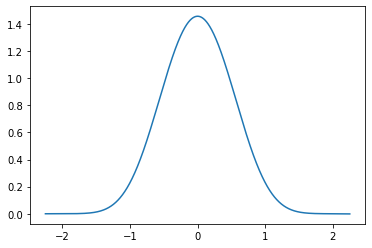

In [787]:
# Plotting
plt.plot(z, -WKB_phi)

In [880]:
# Tolerance on eigenvalue
tolerance = 1e-6

# Eigenvalue guess range
upper_eigenvalue = 0.15
lower_eigenvalue = 0.05

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 1e-50
WKB_solution.beta = 0
scipy_brent_1, results_brent_1 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_1 = WKB_solution.eigenfunction_full(scipy_brent_1)
z = WKB_solution.z

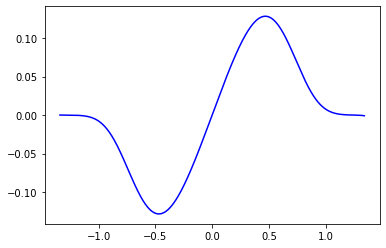

In [881]:
# Plotting
plt.plot(z, WKB_1, "b")

In [882]:
print(results_brent_1)

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.08892418833597275


In [883]:
# Tolerance on eigenvalue
tolerance = 1e-6

# Eigenvalue guess range
upper_eigenvalue = 0.15
lower_eigenvalue = 0.1

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 1e-50
WKB_solution.beta = 0.1
WKB_solution.omega = 1 + np.sqrt(WKB_solution.alpha_bar) + WKB_solution.beta
scipy_brent_1, results_brent_1 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_1 = WKB_solution.eigenfunction_full(scipy_brent_1)
z = WKB_solution.z

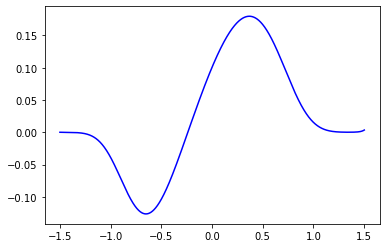

In [884]:
# Plotting
plt.plot(z, WKB_1, "b")
#plt.ylim(-0.5, 0.5)

In [885]:
print(results_brent_1)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.10769343776105435


In [886]:
# Tolerance on eigenvalue
tolerance = 1e-6

# Eigenvalue guess range
upper_eigenvalue = 0.2
lower_eigenvalue = 0.15

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 1e-50
WKB_solution.beta = 0.2
WKB_solution.omega = 1 + np.sqrt(WKB_solution.alpha_bar) + WKB_solution.beta
scipy_brent_1, results_brent_1 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_1 = WKB_solution.eigenfunction_full(scipy_brent_1)
z = WKB_solution.z

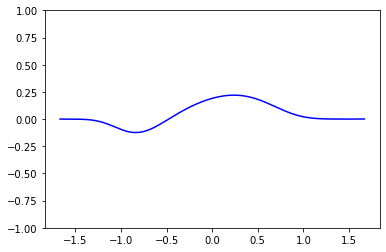

In [887]:
# Plotting
plt.plot(z, WKB_1, "b")
plt.ylim(-1, 1)

In [888]:
print(results_brent_1)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.16103346052128822


In [896]:
# Tolerance on eigenvalue
tolerance = 1e-6

# Eigenvalue guess range
upper_eigenvalue = 0.25
lower_eigenvalue = 0.18

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 1e-50
WKB_solution.beta = 0.25
WKB_solution.omega = 1 + np.sqrt(WKB_solution.alpha_bar) + WKB_solution.beta
scipy_brent_1, results_brent_1 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_1 = WKB_solution.eigenfunction_full(scipy_brent_1)
z = WKB_solution.z

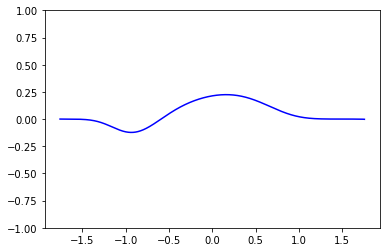

In [897]:
# Plotting
plt.plot(z, WKB_1, "b")
plt.ylim(-1, 1)

In [898]:
print(results_brent_1)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.198105278373144


In [803]:
# Eigenvalue guess range
upper_eigenvalue = 0.35
lower_eigenvalue = 0.25

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 0.01
WKB_solution.beta = 0.1
WKB_solution.omega = 1 + np.sqrt(WKB_solution.alpha_bar) + WKB_solution.beta
scipy_brent_2, results_brent_2 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_2 = WKB_solution.eigenfunction_full(scipy_brent_2)
z = WKB_solution.z

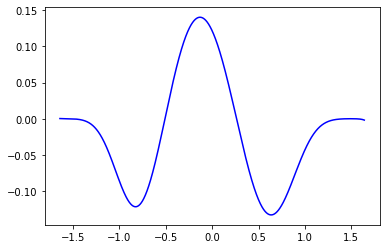

In [804]:
# Plotting
plt.plot(z, WKB_2, "b")
#plt.ylim(-0.003, 0.003)

In [805]:
print(results_brent_2)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.30245238014180226


In [806]:
# Eigenvalue guess range
upper_eigenvalue = 0.4
lower_eigenvalue = 0.3

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 0.01
WKB_solution.beta = 0.2
scipy_brent_2, results_brent_2 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_2 = WKB_solution.eigenfunction_full(scipy_brent_2)
z = WKB_solution.z

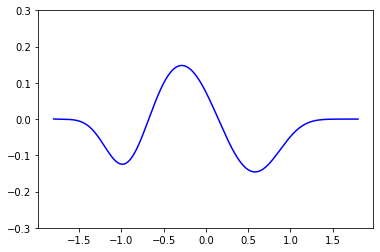

In [807]:
# Plotting
plt.plot(z, WKB_2, "b")
plt.ylim(-0.3, 0.3)

In [808]:
print(results_brent_2)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.337655403316154


In [809]:
# Eigenvalue guess range
upper_eigenvalue = 0.45
lower_eigenvalue = 0.33

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 0.01
WKB_solution.beta = 0.25
scipy_brent_2, results_brent_2 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_2 = WKB_solution.eigenfunction_full(scipy_brent_2)
z = WKB_solution.z

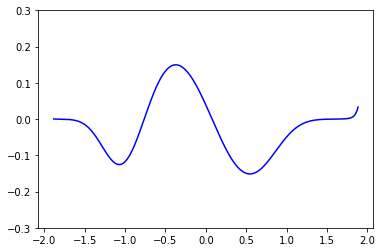

In [810]:
# Plotting
plt.plot(z, WKB_2, "b")
plt.ylim(-0.3, 0.3)

In [811]:
print(results_brent_2)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.36225017254908437


In [812]:
# Eigenvalue guess range
upper_eigenvalue = 0.75
lower_eigenvalue = 0.5

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 0.01
WKB_solution.beta = 0.1
scipy_brent_3, results_brent_3 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_3 = WKB_solution.eigenfunction_full(scipy_brent_3)
z = WKB_solution.z

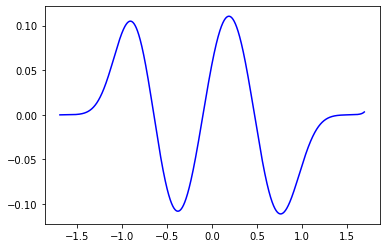

In [813]:
# Plotting
plt.plot(z, -WKB_3, "b")

In [814]:
print(results_brent_3)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.5458861587470725


In [815]:
# Eigenvalue guess range
upper_eigenvalue = 0.75
lower_eigenvalue = 0.55

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 0.01
WKB_solution.beta = 0.2
scipy_brent_3, results_brent_3 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_3 = WKB_solution.eigenfunction_full(scipy_brent_3)
z = WKB_solution.z

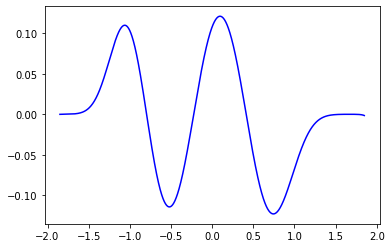

In [816]:
# Plotting
plt.plot(z, -WKB_3, "b")

In [817]:
print(results_brent_3)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.5727853625933643


In [818]:
# Eigenvalue guess range
upper_eigenvalue = 0.75
lower_eigenvalue = 0.57

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 0.01
WKB_solution.beta = 0.25
scipy_brent_3, results_brent_3 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_3 = WKB_solution.eigenfunction_full(scipy_brent_3)
z = WKB_solution.z

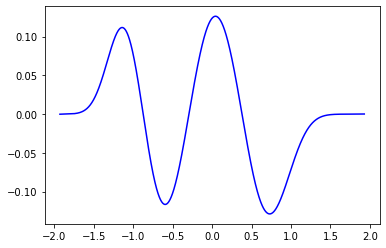

In [819]:
# Plotting
plt.plot(z, -WKB_3, "b")

In [820]:
print(results_brent_3)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.5921894215803571


In [821]:
# Eigenvalue guess range
upper_eigenvalue = 0.9
lower_eigenvalue = 0.8

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 0.01
WKB_solution.beta = 0.1
scipy_brent_4, results_brent_4 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_4 = WKB_solution.eigenfunction_full(scipy_brent_4)
z = WKB_solution.z

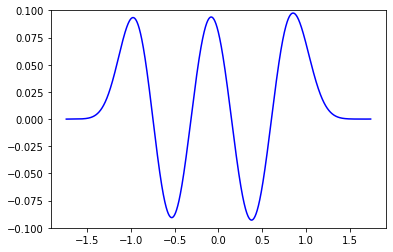

In [822]:
# Plotting
plt.plot(z, -WKB_4, "b")
plt.ylim(-0.1, 0.1)

In [823]:
print(results_brent_4)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.8341050018238724


In [824]:
# Eigenvalue guess range
upper_eigenvalue = 0.9
lower_eigenvalue = 0.83

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 0.01
WKB_solution.beta = 0.2
scipy_brent_4, results_brent_4 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_4 = WKB_solution.eigenfunction_full(scipy_brent_4)
z = WKB_solution.z

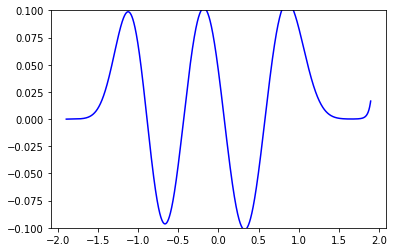

In [825]:
# Plotting
plt.plot(z, -WKB_4, "b")
plt.ylim(-0.1, 0.1)

In [826]:
print(results_brent_4)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.8525222050877261


In [827]:
# Eigenvalue guess range
upper_eigenvalue = 0.9
lower_eigenvalue = 0.85

# Applies WKB approximation to find initial conditions and integrates numerically
WKB_solution = eigenfunction_finder_WKB()
WKB_solution.alpha_bar = 0.01
WKB_solution.beta = 0.25
scipy_brent_4, results_brent_4 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue, upper_eigenvalue, full_output=True, xtol=tolerance)
WKB_4 = WKB_solution.eigenfunction_full(scipy_brent_4)
z = WKB_solution.z

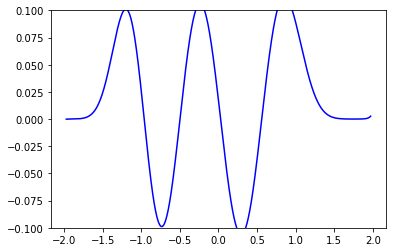

In [828]:
# Plotting
plt.plot(z, -WKB_4, "b")
plt.ylim(-0.1, 0.1)

In [829]:
print(results_brent_4)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.865799532361906


In [830]:
def eigenfunction_slicer(eigenfunction):
    '''Function that cuts out the diverging part of the eigenfunction.
    eigenfunction: eigenfunction to be cut'''
    
    # Loops through eigenfunction
    for i in range(1, len(eigenfunction)):
        # Checks how close to zero the eigenfunction is
        if abs(eigenfunction[-i]) < abs(eigenfunction[-(i + 1)]):
            # Cuts out everything to the right
            eigenfunction[-i:] = np.zeros(len(eigenfunction[-i:]))
            break
    
    return eigenfunction

In [951]:
# Stores initial eigenvalue guess interval
initial_eigenvalue_interval = {}
# Beta = 0
initial_eigenvalue_interval[0, 1] = [0.12, 0.07]
initial_eigenvalue_interval[0, 2] = [0.31, 0.25]
initial_eigenvalue_interval[0, 3] = [0.62, 0.48]
initial_eigenvalue_interval[0, 4] = [0.78, 0.92]
# Beta = 0.1
initial_eigenvalue_interval[1, 1] = [0.13, 0.08]
initial_eigenvalue_interval[1, 2] = [0.34, 0.27]
initial_eigenvalue_interval[1, 3] = [0.58, 0.48]
initial_eigenvalue_interval[1, 4] = [0.87, 0.78]
# Beta = 0.2
initial_eigenvalue_interval[2, 1] = [0.2, 0.13]
initial_eigenvalue_interval[2, 2] = [0.37, 0.29]
initial_eigenvalue_interval[2, 3] = [0.6, 0.54]
initial_eigenvalue_interval[2, 4] = [0.9, 0.8]
# Beta = 0.25
initial_eigenvalue_interval[3, 1] = [0.22, 0.16]
initial_eigenvalue_interval[3, 2] = [0.4, 0.31]
initial_eigenvalue_interval[3, 3] = [0.63, 0.56]
initial_eigenvalue_interval[3, 4] = [0.91, 0.82]

In [874]:
# Tolerance on eigenvalue
tolerance = 1e-6

# Range of parameters 
beta = np.array([0, 0.1, 0.2, 0.25])
alpha = np.logspace(-2, 2, 1000)
omega = np.zeros((len(beta), len(alpha)))
hubble_rate = np.array([1e8, 1e10, 8e13])

# Stores eigenfunctions and z intervals and potential
eigenfunctions = {}
z_values = {}

# Array for eigenvalues
eigenvalues_scaled = np.zeros((len(beta), len(alpha), 5))

# Loops over all values of alpha bar
for i in range(len(beta)):
    for j in range(len(alpha)):
        # Applies WKB approximation to find initial conditions and integrates numerically
        WKB_solution = eigenfunction_finder_WKB()
        WKB_solution.beta = beta[i]
        WKB_solution.alpha_bar = alpha[j]
        omega[i, j] = 1 + np.sqrt(alpha[j]) + beta[i]
        # If first eigenvalue of the chain use the initial intervals
        if j < 1:
            upper_eigenvalue_1 = initial_eigenvalue_interval[i, 1][0]
            lower_eigenvalue_1 = initial_eigenvalue_interval[i, 1][1]
            upper_eigenvalue_2 = initial_eigenvalue_interval[i, 2][0]
            lower_eigenvalue_2 = initial_eigenvalue_interval[i, 2][1]
            upper_eigenvalue_3 = initial_eigenvalue_interval[i, 3][0]
            lower_eigenvalue_3 = initial_eigenvalue_interval[i, 3][1]
            upper_eigenvalue_4 = initial_eigenvalue_interval[i, 4][0]
            lower_eigenvalue_4 = initial_eigenvalue_interval[i, 4][1]
        # If we already have the first eigenvalue set guess range around that value
        if j >= 1:
            upper_eigenvalue_1 = scipy_brent_1 + 0.01
            lower_eigenvalue_1 = scipy_brent_1 - 0.01
            upper_eigenvalue_2 = scipy_brent_2 + 0.01
            lower_eigenvalue_2 = scipy_brent_2 - 0.01
            upper_eigenvalue_3 = scipy_brent_3 + 0.01
            lower_eigenvalue_3 = scipy_brent_3 - 0.01
            upper_eigenvalue_4 = scipy_brent_4 + 0.01
            lower_eigenvalue_4 = scipy_brent_4 - 0.01

        # Applies WKB and root finding algorithm 
        scipy_brent_1, results_brent_1 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_1, upper_eigenvalue_1, full_output=True, xtol=tolerance)
        eigenfunction_1 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_1))
        z_values[i, j] = WKB_solution.z
        dz = z_values[i, j][1] - z_values[i, j][0]
        eigenfunctions[i, j, 1] = eigenfunction_1/simps(eigenfunction_1**2, z_values[i, j], dz)
        eigenvalues_scaled[i, j, 1] = scipy_brent_1
        scipy_brent_2, results_brent_2 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_2, upper_eigenvalue_2, full_output=True, xtol=tolerance)
        eigenfunction_2 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_2))
        eigenfunctions[i, j, 2] = eigenfunction_2/simps(eigenfunction_2**2, z_values[i, j], dz)
        eigenvalues_scaled[i, j, 2] = scipy_brent_2
        scipy_brent_3, results_brent_3 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_3, upper_eigenvalue_3, full_output=True, xtol=tolerance)
        eigenfunction_3 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_3))
        eigenfunctions[i, j, 3] = eigenfunction_3/simps(eigenfunction_3**2, z_values[i, j], dz)
        eigenvalues_scaled[i, j, 3] = scipy_brent_3
        scipy_brent_4, results_brent_4 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_4, upper_eigenvalue_4, full_output=True, xtol=tolerance)
        eigenfunction_4 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_4))
        eigenfunctions[i, j, 4] = eigenfunction_4/simps(eigenfunction_4**2, z_values[i, j], dz)
        eigenvalues_scaled[i, j, 4] = scipy_brent_4
        dimensionless_potential = beta[i]*z_values[i, j]/omega[i, j] + 0.5*alpha[j]*(z_values[i, j]/omega[i, j])**2 + 0.25*(z_values[i, j]/omega[i, j])**4
        eigenfunction_0 = np.exp(-(8/3)*dimensionless_potential*np.pi**2)
        eigenfunctions[i, j, 0] = eigenfunction_0/simps(eigenfunction_0**2, z_values[i, j], dz)

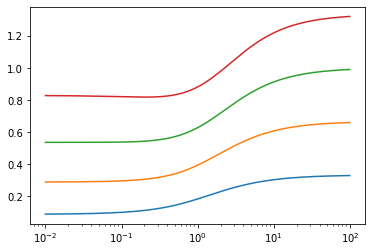

In [876]:
plt.plot(alpha, eigenvalues_scaled[0, :, 1])
plt.plot(alpha, eigenvalues_scaled[0, :, 2])
plt.plot(alpha, eigenvalues_scaled[0, :, 3])
plt.plot(alpha, eigenvalues_scaled[0, :, 4])
plt.xscale("log")

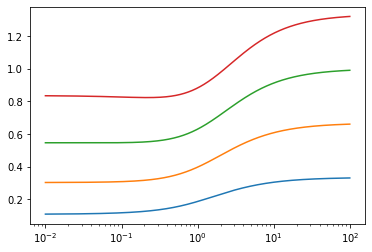

In [877]:
plt.plot(alpha, eigenvalues_scaled[1, :, 1])
plt.plot(alpha, eigenvalues_scaled[1, :, 2])
plt.plot(alpha, eigenvalues_scaled[1, :, 3])
plt.plot(alpha, eigenvalues_scaled[1, :, 4])
plt.xscale("log")

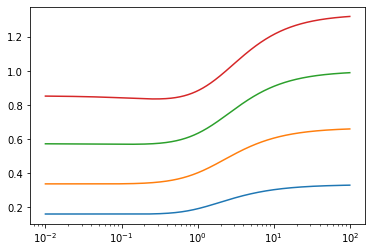

In [878]:
plt.plot(alpha, eigenvalues_scaled[2, :, 1])
plt.plot(alpha, eigenvalues_scaled[2, :, 2])
plt.plot(alpha, eigenvalues_scaled[2, :, 3])
plt.plot(alpha, eigenvalues_scaled[2, :, 4])
plt.xscale("log")

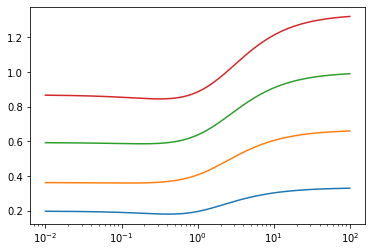

In [879]:
plt.plot(alpha, eigenvalues_scaled[3, :, 1])
plt.plot(alpha, eigenvalues_scaled[3, :, 2])
plt.plot(alpha, eigenvalues_scaled[3, :, 3])
plt.plot(alpha, eigenvalues_scaled[3, :, 4])
plt.xscale("log")

In [954]:
# Upper guess range
eigenvalue_interval_upper = {}
# Beta = 0
eigenvalue_interval_upper[0, 1] = [0.2, 0.4]
eigenvalue_interval_upper[0, 2] = [0.5, 0.7]
eigenvalue_interval_upper[0, 3] = [0.8, 1.1]
eigenvalue_interval_upper[0, 4] = [1.2, 1.4]
# Beta = 0.1
eigenvalue_interval_upper[1, 1] = [0.2, 0.45]
eigenvalue_interval_upper[1, 2] = [0.5, 0.7]
eigenvalue_interval_upper[1, 3] = [0.9, 1.1]
eigenvalue_interval_upper[1, 4] = [1.2, 1.4]
# Beta = 0.2
eigenvalue_interval_upper[2, 1] = [0.2, 0.4]
eigenvalue_interval_upper[2, 2] = [0.5, 0.7]
eigenvalue_interval_upper[2, 3] = [0.9, 1.1]
eigenvalue_interval_upper[2, 4] = [1.2, 1.4]
# Beta = 0.25
eigenvalue_interval_upper[3, 1] = [0.2, 0.45]
eigenvalue_interval_upper[3, 2] = [0.5, 0.7]
eigenvalue_interval_upper[3, 3] = [0.9, 1.1]
eigenvalue_interval_upper[3, 4] = [1.2, 1.4]

In [901]:
eigenvalue_interpolation = {}
# Interpolation for non-pertubative values of alpha
# beta = 0
eigenvalue_interpolation[0, 1] = interpolate.interp1d(alpha, eigenvalues_scaled[0, :, 1])
eigenvalue_interpolation[0, 2] = interpolate.interp1d(alpha, eigenvalues_scaled[0, :, 2])
eigenvalue_interpolation[0, 3] = interpolate.interp1d(alpha, eigenvalues_scaled[0, :, 3])
eigenvalue_interpolation[0, 4] = interpolate.interp1d(alpha, eigenvalues_scaled[0, :, 4])
# beta = 0.1
eigenvalue_interpolation[1, 1] = interpolate.interp1d(alpha, eigenvalues_scaled[1, :, 1])
eigenvalue_interpolation[1, 2] = interpolate.interp1d(alpha, eigenvalues_scaled[1, :, 2])
eigenvalue_interpolation[1, 3] = interpolate.interp1d(alpha, eigenvalues_scaled[1, :, 3])
eigenvalue_interpolation[1, 4] = interpolate.interp1d(alpha, eigenvalues_scaled[1, :, 4])
# beta = 0.2
eigenvalue_interpolation[2, 1] = interpolate.interp1d(alpha, eigenvalues_scaled[2, :, 1])
eigenvalue_interpolation[2, 2] = interpolate.interp1d(alpha, eigenvalues_scaled[2, :, 2])
eigenvalue_interpolation[2, 3] = interpolate.interp1d(alpha, eigenvalues_scaled[2, :, 3])
eigenvalue_interpolation[2, 4] = interpolate.interp1d(alpha, eigenvalues_scaled[2, :, 4])
# beta = 0.25
eigenvalue_interpolation[3, 1] = interpolate.interp1d(alpha, eigenvalues_scaled[3, :, 1])
eigenvalue_interpolation[3, 2] = interpolate.interp1d(alpha, eigenvalues_scaled[3, :, 2])
eigenvalue_interpolation[3, 3] = interpolate.interp1d(alpha, eigenvalues_scaled[3, :, 3])
eigenvalue_interpolation[3, 4] = interpolate.interp1d(alpha, eigenvalues_scaled[3, :, 4])

In [959]:
# Tolerance on eigenvalue
tolerance = 1e-6

# Parameters
self_coupling = np.logspace(-1, 1, 10)
mass = np.logspace(-2, 13, 50)
hubble_rate = np.array([1e8, 1e10, 8e13])
beta = np.array([0, 0.1, 0.2, 0.25])
mu = np.zeros((len(beta), len(mass), len(self_coupling), len(hubble_rate)))

# Stores eigenfunctions and z intervals and potential
eigenfunctions = {}
z_values = {}
phi_values = {}

# Array for eigenvalues
eigenvalues_scaled = np.zeros((len(beta), len(mass), len(self_coupling), len(hubble_rate), 5))
eigenvalues = np.zeros((len(beta), len(mass), len(self_coupling), len(hubble_rate), 5))

# Loops over all values of alpha bar
for i in range(len(beta)):
    for j in range(len(mass)):
        for k in range(len(self_coupling)):
            for l in range(len(hubble_rate)):
                # Determines value of mu
                mu = (beta[i]*(hubble_rate[l]**3)*self_coupling[k]**0.25)**(1/3)
                # Applies WKB approximation to find initial conditions and integrates numerically
                WKB_solution = eigenfunction_finder_WKB()
                WKB_solution.beta = beta[i]
                alpha_1 = (mass[j]**2)/(np.sqrt(self_coupling[k])*hubble_rate[l]**2)
                WKB_solution.alpha_bar = alpha_1
                omega = 1 + np.sqrt(alpha_1) + beta[i]
                # If in massless limit find eigenvalues with root solver
                if alpha_1 <= 0.01:
                    upper_eigenvalue_1 = initial_eigenvalue_interval[i, 1][0]
                    lower_eigenvalue_1 = initial_eigenvalue_interval[i, 1][1]
                    upper_eigenvalue_2 = initial_eigenvalue_interval[i, 2][0]
                    lower_eigenvalue_2 = initial_eigenvalue_interval[i, 2][1]
                    upper_eigenvalue_3 = initial_eigenvalue_interval[i, 3][0]
                    lower_eigenvalue_3 = initial_eigenvalue_interval[i, 3][1]
                    upper_eigenvalue_4 = initial_eigenvalue_interval[i, 4][0]
                    lower_eigenvalue_4 = initial_eigenvalue_interval[i, 4][1]

                    # Applies WKB and root finding algorithm 
                    # n = 1
                    scipy_brent_1, results_brent_1 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_1, upper_eigenvalue_1, full_output=True, xtol=tolerance)
                    eigenfunction_1 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_1))
                    z_values[i, j, k, l] = WKB_solution.z
                    phi_values[i, j, k, l] = z_values[i, j, k, l]*hubble_rate[l]/(omega*self_coupling[k]**0.25)
                    dz = z_values[i, j, k, l][1] - z_values[i, j, k, l][0]
                    eigenfunctions[i, j, k, l, 1] = eigenfunction_1/simps(eigenfunction_1**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 1] = scipy_brent_1
                    eigenvalues[i, j, k, l, 1] = scipy_brent_1*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    # n = 2
                    scipy_brent_2, results_brent_2 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_2, upper_eigenvalue_2, full_output=True, xtol=tolerance)
                    eigenfunction_2 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_2))
                    eigenfunctions[i, j, k, l, 2] = eigenfunction_2/simps(eigenfunction_2**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 2] = scipy_brent_2
                    eigenvalues[i, j, k, l, 2] = scipy_brent_2*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    # n = 3
                    scipy_brent_3, results_brent_3 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_3, upper_eigenvalue_3, full_output=True, xtol=tolerance)
                    eigenfunction_3 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_3))
                    eigenfunctions[i, j, k, l, 3] = eigenfunction_3/simps(eigenfunction_3**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 3] = scipy_brent_3
                    eigenvalues[i, j, k, l, 3] = scipy_brent_3*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    # n = 4
                    scipy_brent_4, results_brent_4 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_4, upper_eigenvalue_4, full_output=True, xtol=tolerance)
                    eigenfunction_4 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_4))
                    eigenfunctions[i, j, k, l, 4] = eigenfunction_4/simps(eigenfunction_4**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 4] = scipy_brent_4
                    eigenvalues[i, j, k, l, 4] = scipy_brent_4*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                elif alpha_1 >= 100:
                    upper_eigenvalue_1 = eigenvalue_interval_upper[i, 1][0]
                    lower_eigenvalue_1 = eigenvalue_interval_upper[i, 1][1]
                    upper_eigenvalue_2 = eigenvalue_interval_upper[i, 2][0]
                    lower_eigenvalue_2 = eigenvalue_interval_upper[i, 2][1]
                    upper_eigenvalue_3 = eigenvalue_interval_upper[i, 3][0]
                    lower_eigenvalue_3 = eigenvalue_interval_upper[i, 3][1]
                    upper_eigenvalue_4 = eigenvalue_interval_upper[i, 4][0]
                    lower_eigenvalue_4 = eigenvalue_interval_upper[i, 4][1]

                    # Applies WKB and root finding algorithm 
                    # n = 1
                    scipy_brent_1, results_brent_1 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_1, upper_eigenvalue_1, full_output=True, xtol=tolerance)
                    eigenfunction_1 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_1))
                    z_values[i, j, k, l] = WKB_solution.z
                    phi_values[i, j, k, l] = z_values[i, j, k, l]*hubble_rate[l]/(omega*self_coupling[k]**0.25)
                    dz = z_values[i, j, k, l][1] - z_values[i, j, k, l][0]
                    eigenfunctions[i, j, k, l, 1] = eigenfunction_1/simps(eigenfunction_1**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 1] = scipy_brent_1
                    eigenvalues[i, j, k, l, 1] = scipy_brent_1*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    # n = 2
                    scipy_brent_2, results_brent_2 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_2, upper_eigenvalue_2, full_output=True, xtol=tolerance)
                    eigenfunction_2 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_2))
                    eigenfunctions[i, j, k, l, 2] = eigenfunction_2/simps(eigenfunction_2**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 2] = scipy_brent_2
                    eigenvalues[i, j, k, l, 2] = scipy_brent_2*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    # n = 3
                    scipy_brent_3, results_brent_3 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_3, upper_eigenvalue_3, full_output=True, xtol=tolerance)
                    eigenfunction_3 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_3))
                    eigenfunctions[i, j, k, l, 3] = eigenfunction_3/simps(eigenfunction_3**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 3] = scipy_brent_3
                    eigenvalues[i, j, k, l, 3] = scipy_brent_3*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    # n = 4
                    scipy_brent_4, results_brent_4 = optimize.brentq(WKB_solution.eigenfunction, lower_eigenvalue_4, upper_eigenvalue_4, full_output=True, xtol=tolerance)
                    eigenfunction_4 = eigenfunction_slicer(WKB_solution.eigenfunction_full(scipy_brent_4))
                    eigenfunctions[i, j, k, l, 4] = eigenfunction_4/simps(eigenfunction_4**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 4] = scipy_brent_4
                    eigenvalues[i, j, k, l, 4] = scipy_brent_4*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                else:
                    # n = 1
                    eigenvalue_1 = eigenvalue_interpolation[i, 1](alpha_1)
                    WKB_solution.eigenfunction(eigenvalue_1)
                    eigenfunction_1 = eigenfunction_slicer(WKB_solution.eigenfunction_full(eigenvalue_1))
                    z_values[i, j, k, l] = WKB_solution.z
                    phi_values[i, j, k, l] = z_values[i, j, k, l]*hubble_rate[l]/(omega*self_coupling[k]**0.25)
                    dz = z_values[i, j, k, l][1] - z_values[i, j, k, l][0]
                    eigenfunctions[i, j, k, l, 1] = eigenfunction_1/simps(eigenfunction_1**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 1] = eigenvalue_1
                    eigenvalues[i, j, k, l, 1] = eigenvalue_1*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    # n = 2
                    eigenvalue_2 = eigenvalue_interpolation[i, 2](alpha_1)
                    eigenfunction_2 = eigenfunction_slicer(WKB_solution.eigenfunction_full(eigenvalue_2))
                    eigenfunctions[i, j, k, l, 2] = eigenfunction_2/simps(eigenfunction_2**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 2] = eigenvalue_2
                    eigenvalues[i, j, k, l, 2] = eigenvalue_2*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    # n = 3
                    eigenvalue_3 = eigenvalue_interpolation[i, 3](alpha_1)
                    eigenfunction_3 = eigenfunction_slicer(WKB_solution.eigenfunction_full(eigenvalue_3))
                    eigenfunctions[i, j, k, l, 3] = eigenfunction_3/simps(eigenfunction_3**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 3] = eigenvalue_3
                    eigenvalues[i, j, k, l, 3] = eigenvalue_3*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    # n = 4
                    eigenvalue_4 = eigenvalue_interpolation[i, 4](alpha_1)
                    eigenfunction_4 = eigenfunction_slicer(WKB_solution.eigenfunction_full(eigenvalue_4))
                    eigenfunctions[i, j, k, l, 4] = eigenfunction_4/simps(eigenfunction_4**2, z_values[i, j, k, l], dz)
                    eigenvalues_scaled[i, j, k, l, 4] = eigenvalue_4
                    eigenvalues[i, j, k, l, 4] = eigenvalue_4*hubble_rate[l]*np.sqrt(self_coupling[k])*(1 + alpha_1 + beta[i]**2)
                    
                # n = 0 eigenfunction
                dimensionless_potential = beta[i]*z_values[i, j, k, l]/omega + 0.5*alpha_1*(z_values[i, j, k, l]/omega)**2 + 0.25*(z_values[i, j, k, l]/omega)**4
                eigenfunction_0 = np.exp(-(8/3)*dimensionless_potential*np.pi**2)
                eigenfunctions[i, j, k, l, 0] = eigenfunction_0/simps(eigenfunction_0**2, z_values[i, j, k, l], dz)

In [875]:
print(eigenvalues_scaled[:, :, 1])
print(eigenvalues_scaled[:, :, 2])
print(eigenvalues_scaled[:, :, 3])
print(eigenvalues_scaled[:, :, 4])

[[0.09018077 0.09019222 0.09020395 ... 0.33014215 0.33017182 0.33020123]
 [0.10860148 0.10860971 0.10861818 ... 0.33011972 0.33014961 0.33017923]
 [0.16092274 0.16092173 0.16092072 ... 0.33003364 0.3300643  0.33009469]
 [0.19725452 0.19724682 0.19723893 ... 0.32996664 0.3299979  0.33002889]]
[[0.29001677 0.29002282 0.29002895 ... 0.66004026 0.66010063 0.66016046]
 [0.30245258 0.30245648 0.30246049 ... 0.65998004 0.66004096 0.66010133]
 [0.33765524 0.33765388 0.33765236 ... 0.65978841 0.65985105 0.65991312]
 [0.36225005 0.36224521 0.36224037 ... 0.65964333 0.65970726 0.65977062]]
[[0.53662534 0.53662519 0.53662502 ... 0.98999834 0.99008905 0.99017895]
 [0.54588603 0.54588459 0.54588314 ... 0.98990259 0.98999416 0.99008495]
 [0.57278541 0.57278035 0.57277526 ... 0.9896084  0.98970263 0.989796  ]
 [0.59218943 0.59218188 0.59217428 ... 0.98938701 0.98948321 0.98957855]]
[[0.82777457 0.82776409 0.82775345 ... 1.31998064 1.32010148 1.32022124]
 [0.83410504 0.83409365 0.83408213 ... 1.3198504

In [1062]:
np.roll(t, -1)

array([  0.1001001 ,   0.2002002 ,   0.3003003 ,   0.4004004 ,
         0.5005005 ,   0.6006006 ,   0.7007007 ,   0.8008008 ,
         0.9009009 ,   1.001001  ,   1.1011011 ,   1.2012012 ,
         1.3013013 ,   1.4014014 ,   1.5015015 ,   1.6016016 ,
         1.7017017 ,   1.8018018 ,   1.9019019 ,   2.002002  ,
         2.1021021 ,   2.2022022 ,   2.3023023 ,   2.4024024 ,
         2.5025025 ,   2.6026026 ,   2.7027027 ,   2.8028028 ,
         2.9029029 ,   3.003003  ,   3.1031031 ,   3.2032032 ,
         3.3033033 ,   3.4034034 ,   3.5035035 ,   3.6036036 ,
         3.7037037 ,   3.8038038 ,   3.9039039 ,   4.004004  ,
         4.1041041 ,   4.2042042 ,   4.3043043 ,   4.4044044 ,
         4.5045045 ,   4.6046046 ,   4.7047047 ,   4.8048048 ,
         4.9049049 ,   5.00500501,   5.10510511,   5.20520521,
         5.30530531,   5.40540541,   5.50550551,   5.60560561,
         5.70570571,   5.80580581,   5.90590591,   6.00600601,
         6.10610611,   6.20620621,   6.30630631,   6.40

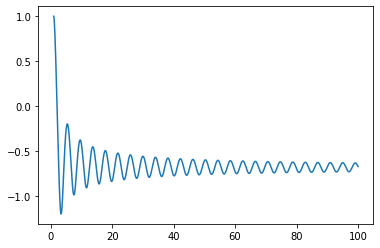

In [1076]:
def ode(x, t):
    dx = np.zeros(2)
    dx[0] = x[1]
    dx[1] = -1 - x[0] - x[0]**3 - 3*x[1]/(2*t)
    
    return dx
    
def rk4(fun, x_init, t):
    dt = np.roll(t, -1) - t 
    x = np.zeros((len(t), len(x_init)))
    x[0] = x_init
    for i in range(len(t) - 1):
        k1 = dt[i]*fun(x[i, :], t[i])
        k2 = dt[i]*fun(x[i, :] + k1/2, t[i] + dt[i]/2)
        k3 = dt[i]*fun(x[i, :] + k2/2, t[i] + dt[i]/2)
        k4 = dt[i]*fun(x[i, :] + k3, t[i] + dt[i])
        x[i + 1] = x[i] + (k1 + 2*(k2 + k3) + k4)/6
    return x
        
x = [1, 0]
t = np.linspace(1, 100, 1000)
x = rk4(ode, x, t)
plt.plot(t, x[:, 0])

In [1017]:
x = np.array([0, 1])
y = np.array([4, 2])
np.append(x, y)

array([0, 1, 4, 2])

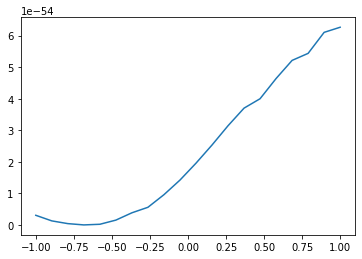

In [1097]:
# Object that gives the equation of motion for the field
class equation_of_motion:
    '''Equation of motion for the field'''
    
    def __init__(self):
        # Initializes parameters
        self.mass = 1
        self.mu = 1
        self.self_coupling = 1
        self.hubble_rate_today = (67.36e3)/((1.56e38)*(3e8)) # GeV
        #self.time_today = 1/(2*self.hubble_rate_today) # Year
        #self.scale_today = np.sqrt(self.time_today)
    
    def potential(self, phi):
        '''Computes the potential of the field at a given point'''
        
        # Determine minima so the potential can be readjusted to give physical energy density values
        test_field = np.linspace(-10, 0, 10000)
        test_potential = test_field*self.mu**3 + 0.5*(self.mass*test_field)**2 + 0.25*self.self_coupling*test_field**4
        minima = np.min(test_potential)
        self.phi_minima = test_field[np.argmin(test_potential)]
        self.effective_mass = np.sqrt(self.mass**2 + 3*self.self_coupling*self.phi_minima**2)
        self.energy_density_dust = 0.5*(self.effective_mass*0.1)**2
        
        # Evaluates potential
        potential = phi*self.mu**3 + 0.5*(self.mass*phi)**2 + 0.25*self.self_coupling*phi**4 + abs(minima)
        
        return potential
    
    def ode_field(self, phi, a):
        '''ODE system for the scalar field dynamics'''
        # Empty array to store numerical differential elements
        dphi = np.zeros(len(phi))
    
        # ODE system
        dphi[0] = phi[1]
        dphi[1] = -(2/(a))*phi[1] + (- self.mu**3 - phi[0]*self.mass**2 - self.self_coupling*phi[0]**3)*(a/self.hubble_rate_today)**2
        
        #print(1)
        
        return dphi
    
    def rk4(self, fun, x_init, t):
        '''Applies the RK4 algorithm and evaluates the energy density at each point'''
        dt = np.roll(t, -1) - t 
        x = np.zeros((len(t), len(x_init)))
        x[0] = x_init
        for i in range(len(t) - 1):
            k1 = dt[i]*fun(x[i, :], t[i])
            k2 = dt[i]*fun(x[i, :] + k1/2, t[i] + dt[i]/2)
            k3 = dt[i]*fun(x[i, :] + k2/2, t[i] + dt[i]/2)
            k4 = dt[i]*fun(x[i, :] + k3, t[i] + dt[i])
            x[i + 1] = x[i] + (k1 + 2*(k2 + k3) + k4)/6
            
            # Energy density
            energy_density = 0.5*(self.hubble_rate_today*x[i + 1, 1]/t[i])**2 + self.potential(x[i + 1, 0])
            if energy_density < self.energy_density_dust:
                self.dust_a = t[i + 1]
                self.dust_energy_density = energy_density
                break
            
        return x
    
    def ode_solver(self, phi):
        '''Solves the ODE system for the scalar field'''
        
        # Hubble rate at the start of oscillations
        hubble_oscillation = np.sqrt(self.mass**2 + 3*self.self_coupling*phi[0]**2)
        a_oscillation = np.sqrt(self.hubble_rate_today/hubble_oscillation)


        a = np.logspace(np.log10(a_oscillation), np.log10(a_oscillation) + 4, 2000)
        # Determines the solution for the field dynamics
        field = self.rk4(self.ode_field, phi, a)
        # Energy density at the time of CMB formation and today
        energy_density_cmb = self.dust_energy_density*(self.dust_a/1e-3)**3
        energy_density_today = self.dust_energy_density*(self.dust_a)**3    
        
        return energy_density_cmb, energy_density_today
    
field_dynamics = equation_of_motion()

phi = np.linspace(-1, 1, 20)
cmb_energy_density = np.zeros(len(phi))
today_energy_density = np.zeros(len(phi))
for i in range(len(phi)):
    field_input = [phi[i], 0]
    energy_density_cmb, energy_density_today = field_dynamics.ode_solver(field_input)
    cmb_energy_density[i] = energy_density_cmb
    today_energy_density[i] = energy_density_today
#print(field[:, 0])
#print(energy_density)
#plt.plot(a[5:]/np.sqrt(t_h0), field[5:, 0], "b")
#plt.xscale("log")
plt.plot(phi, cmb_energy_density)
#plt.ylim(-2, 2)
#max_y = 0.001
#plt.ylim(-max_y, max_y)

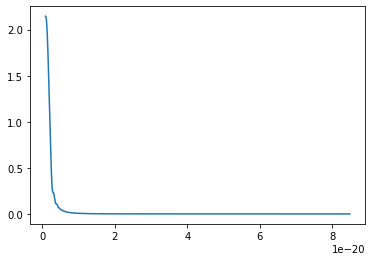

In [1089]:
plt.plot(a, energy_density)


In [1054]:
energy_density


array([2.14535296e+00, 2.14535293e+00, 2.14535274e+00, ...,
       1.04148154e-05, 1.03401483e-05, 1.02718267e-05])

In [1100]:
(gamma(5/4)**2)/np.pi